In [1]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import textwrap
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# special things
from pivottablejs import pivot_ui
from ipywidgets import FloatSlider, interactive, IntSlider
from scipy import interpolate

# sql
%load_ext sql_magic
import sqlalchemy
import sqlite3
from sqlalchemy import create_engine
sqlite_engine = create_engine('sqlite://')

# autoreload
%load_ext autoreload
%autoreload 1
# %aimport module_to_reload

# ehh...
# import bqplot.pyplot as plt
import ipyvolume as ipv
import altair as alt
from vega_datasets import data

import seaborn as sns
sns.set_context('poster', font_scale=1.3)

import qgrid

## QGrid

Interactive pandas dataframes: https://github.com/quantopian/qgrid

In [2]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,103295,18.0,Independent Producer Operator,39175.0,Appalachia Southern,Bibb,Seymour Mine,Alabama,Active,Surface,Hope Coal Company Inc,"P.O. Box 249, Maylene, AL 35114",Mine only,105082.0,NaN,2008
1,103117,19.0,Operating Subsidiary,29926.0,Appalachia Southern,Cullman,"Mine #2, #3, #4",Alabama,"Active, men working, not producing",Surface,Twin Pines Coal Company Inc,"1874 County Road 15, Bremen, AL 35033",Mine only,10419.0,NaN,2008
2,103361,20.0,Operating Subsidiary,42542.0,Appalachia Southern,Cullman,Cold Springs West Mine,Alabama,Active,Surface,Twin Pines Coal Company,"74 Industrial Parkway, Jasper, AL 35502",Mine only,143208.0,NaN,2008
3,100759,395.0,Operating Subsidiary,890710.0,Appalachia Southern,Fayette,North River # 1 Underground Mi,Alabama,Active,Underground,Chevron Mining Inc,"3114 County Road 63 S, Berry, AL 35546",Mine and Preparation Plant,2923261.0,United Mine Workers of America,2008
4,103246,22.0,Independent Producer Operator,55403.0,Appalachia Southern,Franklin,Bear Creek,Alabama,Active,Surface,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Mine only,183137.0,NaN,2008


In [3]:
df.shape

(9042, 16)

In [4]:
df.columns

Index(['MSHA_ID', 'Average_Employees', 'Company_Type', 'Labor_Hours',
       'Mine_Basin', 'Mine_County', 'Mine_Name', 'Mine_State', 'Mine_Status',
       'Mine_Type', 'Operating_Company', 'Operating_Company_Address',
       'Operation_Type', 'Production_short_tons', 'Union_Code', 'Year'],
      dtype='object')

In [5]:
qgrid_widget = qgrid.show_grid(
    df[["Year", "Mine_State", "Labor_Hours", "Production_short_tons"]],
    show_toolbar=True,
)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
df2 = df[df['Mine_State'] != "Wyoming"].groupby('Mine_State').sum()

In [9]:
df3

NameError: name 'df3' is not defined

In [ ]:
df3 = df.groupby('Mine_State').sum()

In [10]:
%aimport insight.plotting

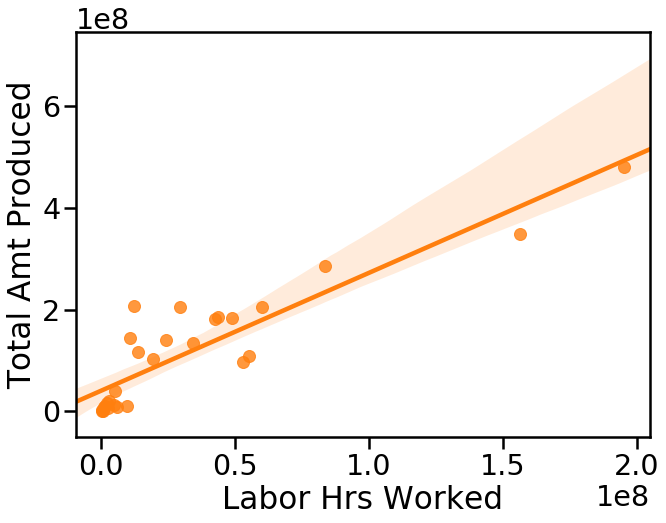

In [13]:
insight.plotting.plot_prod_vs_hours(df2, color_index=1)

In [ ]:
def plot_prod_vs_hours(
    df, color_index=0, output_file="../img/production-vs-hours-worked.png"
):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.regplot(
        df["Labor_Hours"],
        df["Production_short_tons"],
        ax=ax,
        color=sns.color_palette()[color_index],
    )
    ax.set_xlabel("Labor Hours Worked")
    ax.set_ylabel("Total Amount Produced")
    x = ax.set_xlim(-9506023.213266129, 204993853.21326613)
    y = ax.set_ylim(-51476801.43653282, 746280580.4034251)
    fig.tight_layout()
    fig.savefig(output_file)

In [ ]:
plot_prod_vs_hours(df2, color_index=0)

In [ ]:
plot_prod_vs_hours(df3, color_index=1)

In [ ]:
# make a change via qgrid
df3 = qgrid_widget.get_changed_df()

## Github 

https://github.com/jbwhit/jupyter-tips-and-tricks/commit/d3f2c0cef4dfd28eb3b9077595f14597a3022b1c?short_path=04303fc#diff-04303fce5e9bb38bcee25d12d9def22e

In [ ]:
qgrid_widget = qgrid.show_grid(
    df2[["Year", "Labor_Hours", "Production_short_tons"]],
    show_toolbar=True,
)
qgrid_widget